# Analysis of repository collection

In this notebook, the retrieved results of the repository collection is analyzed.

In [1]:
from datetime import date
import os
import statistics
from pathlib import Path
from pprint import pprint

import pandas as pd
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib.table as table
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

Folders and constants

In [3]:
subset = "all"  # "user", "group", "all"

# file paths
fp_repos = Path("results", "repositories_filtered.csv")
fp_figs = Path("figs")

# create output folder if not exists
fp_figs.mkdir(exist_ok=True)

## Load filtered repositories

Load (manually) filtered repositories into notebook.

In [4]:
repos = pd.read_csv(fp_repos)

## Filtering for research groups or private users only (manual annotation not yet done)

In [5]:
users = pd.read_csv("../collect_users/results/annotated.csv", error_bad_lines=False,  delimiter=';')

/var/folders/80/92jv0gdd74n_p57srnsh1wcr0000gp/T/ipykernel_15968/1328199163.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv("../collect_users/results/annotated.csv", error_bad_lines=False,  delimiter=';')


In [6]:
# TODO: replace by join?
def add_research_group_filter(dataset):
    user_is_research_group = []
    for row in dataset.iterrows():
        try:
            owner = row[1]['owner']
        except:
            owner = row[1]['html_url_repository'].split('/')[-2]
            
            
      
        row_users = users.loc[users['user_id'] == owner]
        if len(row_users['is_research_group']) == 0:
            user_is_research_group.append(False)
        for i in row_users['is_research_group']:
            if i == 1:
                user_is_research_group.append(True)
                break
            else:
                user_is_research_group.append(False)
                break
                    
    return user_is_research_group
    

In [7]:
repos['is_research_group'] = add_research_group_filter(repos)

## Subset repositories

Make a subset of repositories on "user", "group", or "all".
- "user" - Account of individual researcher
- "group" - Account of research group
- "all" - Both individual researcher or research group

In [8]:
if subset == "user":
    repos = repos[~repos['is_research_group']]
elif subset == "group":
    repos = repos[repos['is_research_group']]

## Datasets

Using the github API, metadata on the repositories was collected. 

In [9]:
print("The repository data from Github contains the following columns:")
pprint(repos.columns.tolist())

The repository data from Github contains the following columns:
['id',
 'node_id',
 'name',
 'full_name',
 'private',
 'owner',
 'html_url',
 'description',
 'fork',
 'url',
 'forks_url',
 'keys_url',
 'collaborators_url',
 'teams_url',
 'hooks_url',
 'issue_events_url',
 'events_url',
 'assignees_url',
 'branches_url',
 'tags_url',
 'blobs_url',
 'git_tags_url',
 'git_refs_url',
 'trees_url',
 'statuses_url',
 'languages_url',
 'stargazers_url',
 'contributors_url',
 'subscribers_url',
 'subscription_url',
 'commits_url',
 'git_commits_url',
 'comments_url',
 'issue_comment_url',
 'contents_url',
 'compare_url',
 'merges_url',
 'archive_url',
 'downloads_url',
 'issues_url',
 'pulls_url',
 'milestones_url',
 'notifications_url',
 'labels_url',
 'releases_url',
 'deployments_url',
 'created_at',
 'updated_at',
 'pushed_at',
 'git_url',
 'ssh_url',
 'clone_url',
 'svn_url',
 'homepage',
 'size',
 'stargazers_count',
 'watchers_count',
 'language',
 'has_issues',
 'has_projects',
 'has_d

## Stargazers

Stargazers represent the amount of people that have 'starred' a Github project. Starring a project can indicate that a user likes the project. It can also be used to bookmark a project, since starred projects are saved. The amount of stargazers can be used as a metric to measure popularity. 

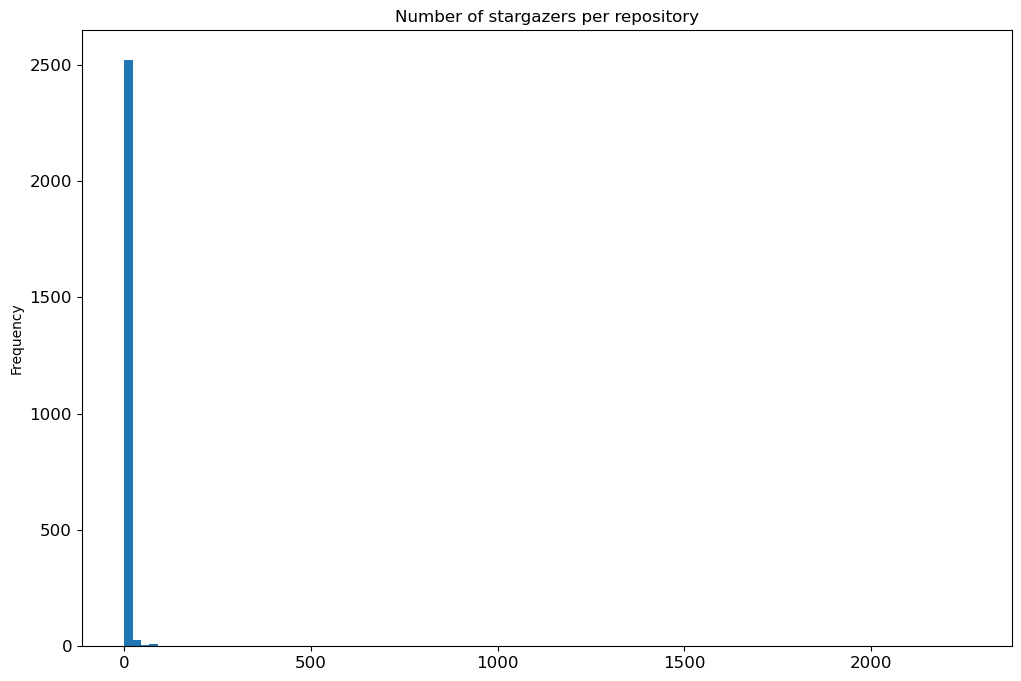

In [10]:
repos['stargazers_count'].plot(kind = 'hist', fontsize = 12, title = 'Number of stargazers per repository', bins = 100)
plt.savefig(Path(fp_figs, f'stargazers_{subset}.png'))


In [11]:
repos.nlargest(10, 'stargazers_count')

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,web_commit_signoff_required,topics,visibility,forks,open_issues,watchers,default_branch,permissions,date,is_research_group
2003,12091112,MDEwOlJlcG9zaXRvcnkxMjA5MTExMg==,sqlpp11,rbock/sqlpp11,False,rbock,https://github.com/rbock/sqlpp11,A type safe SQL template library for C++,False,https://api.github.com/repos/rbock/sqlpp11,...,False,[],public,345,23,2263,main,NaN,2023-09-09,False
1916,58459878,MDEwOlJlcG9zaXRvcnk1ODQ1OTg3OA==,clingo,potassco/clingo,False,potassco,https://github.com/potassco/clingo,🤔 A grounder and solver for logic programs.,False,https://api.github.com/repos/potassco/clingo,...,False,"['answer-set-programming', 'declarative-progra...",public,75,8,523,master,NaN,2023-09-09,True
1346,65741668,MDEwOlJlcG9zaXRvcnk2NTc0MTY2OA==,spacy-api-docker,jgontrum/spacy-api-docker,False,jgontrum,https://github.com/jgontrum/spacy-api-docker,"spaCy REST API, wrapped in a Docker container.",False,https://api.github.com/repos/jgontrum/spacy-ap...,...,False,"['docker', 'microservice', 'natural-language-p...",public,98,25,251,master,NaN,2023-09-09,False
1846,290899681,MDEwOlJlcG9zaXRvcnkyOTA4OTk2ODE=,odbc2parquet,pacman82/odbc2parquet,False,pacman82,https://github.com/pacman82/odbc2parquet,A command line tool to query an ODBC data sour...,False,https://api.github.com/repos/pacman82/odbc2par...,...,False,"['odbc', 'parquet']",public,12,4,164,main,NaN,2023-09-09,False
1186,131267949,MDEwOlJlcG9zaXRvcnkxMzEyNjc5NDk=,rainymotion,hydrogo/rainymotion,False,hydrogo,https://github.com/hydrogo/rainymotion,Python library for radar-based precipitation n...,False,https://api.github.com/repos/hydrogo/rainymotion,...,False,[],public,53,5,163,master,NaN,2023-09-09,False
694,9429665,MDEwOlJlcG9zaXRvcnk5NDI5NjY1,after-effects-script-snippets,ff6347/after-effects-script-snippets,False,ff6347,https://github.com/ff6347/after-effects-script...,this is a loose collection of js snippets for ...,False,https://api.github.com/repos/ff6347/after-effe...,...,False,[],public,34,0,157,master,NaN,2023-09-09,False
323,151979487,MDEwOlJlcG9zaXRvcnkxNTE5Nzk0ODc=,chor-js,bptlab/chor-js,False,bptlab,https://github.com/bptlab/chor-js,An editor for BPMN 2.0 choreography diagrams b...,False,https://api.github.com/repos/bptlab/chor-js,...,False,[],public,24,4,138,master,NaN,2023-09-09,True
2004,12629151,MDEwOlJlcG9zaXRvcnkxMjYyOTE1MQ==,sqlpp11-connector-mysql,rbock/sqlpp11-connector-mysql,False,rbock,https://github.com/rbock/sqlpp11-connector-mysql,A C++ wrapper for mysql meant to be used in co...,False,https://api.github.com/repos/rbock/sqlpp11-con...,...,False,[],public,63,0,127,archive,NaN,2023-09-09,False
1913,58460549,MDEwOlJlcG9zaXRvcnk1ODQ2MDU0OQ==,clasp,potassco/clasp,False,potassco,https://github.com/potassco/clasp,⚙️ A conflict-driven nogood learning answer se...,False,https://api.github.com/repos/potassco/clasp,...,False,[],public,13,2,101,master,NaN,2023-09-09,True
1185,236913315,MDEwOlJlcG9zaXRvcnkyMzY5MTMzMTU=,rainnet,hydrogo/rainnet,False,hydrogo,https://github.com/hydrogo/rainnet,RainNet: a convolutional neural network for ra...,False,https://api.github.com/repos/hydrogo/rainnet,...,False,[],public,58,6,94,master,NaN,2023-09-09,False


## Watchers

Watchers receive  notifications about project activity.

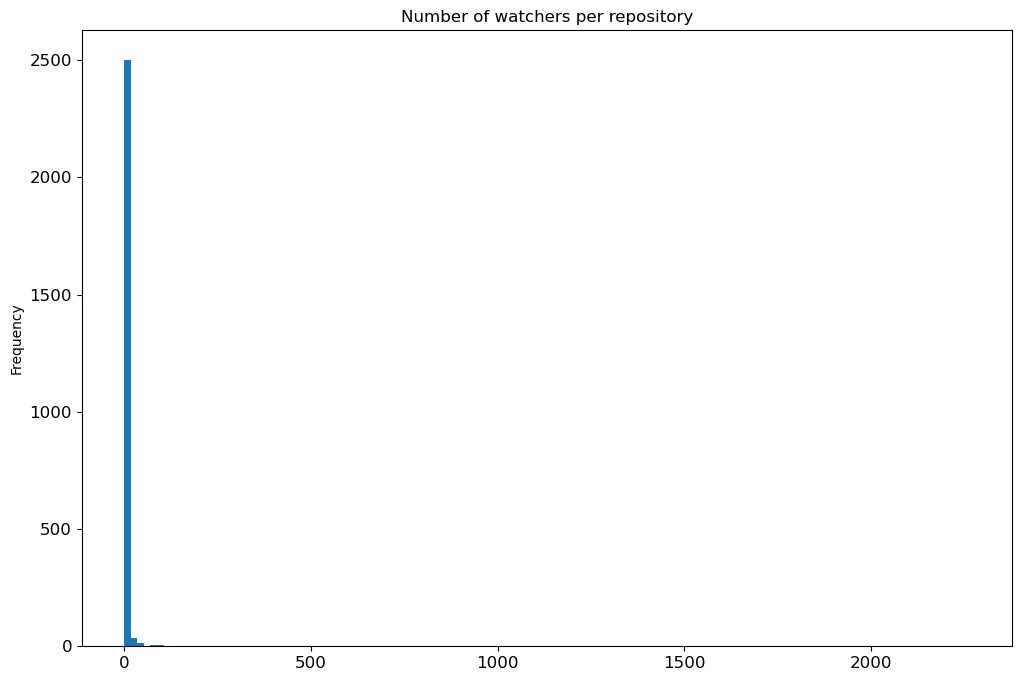

In [12]:
repos['watchers_count'].plot.hist(fontsize = 12, title = 'Number of watchers per repository', bins = 128)
plt.savefig(Path(fp_figs, f'watchers_{subset}.png'))

In [13]:
repos.nlargest(10, 'watchers_count')

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,web_commit_signoff_required,topics,visibility,forks,open_issues,watchers,default_branch,permissions,date,is_research_group
2003,12091112,MDEwOlJlcG9zaXRvcnkxMjA5MTExMg==,sqlpp11,rbock/sqlpp11,False,rbock,https://github.com/rbock/sqlpp11,A type safe SQL template library for C++,False,https://api.github.com/repos/rbock/sqlpp11,...,False,[],public,345,23,2263,main,NaN,2023-09-09,False
1916,58459878,MDEwOlJlcG9zaXRvcnk1ODQ1OTg3OA==,clingo,potassco/clingo,False,potassco,https://github.com/potassco/clingo,🤔 A grounder and solver for logic programs.,False,https://api.github.com/repos/potassco/clingo,...,False,"['answer-set-programming', 'declarative-progra...",public,75,8,523,master,NaN,2023-09-09,True
1346,65741668,MDEwOlJlcG9zaXRvcnk2NTc0MTY2OA==,spacy-api-docker,jgontrum/spacy-api-docker,False,jgontrum,https://github.com/jgontrum/spacy-api-docker,"spaCy REST API, wrapped in a Docker container.",False,https://api.github.com/repos/jgontrum/spacy-ap...,...,False,"['docker', 'microservice', 'natural-language-p...",public,98,25,251,master,NaN,2023-09-09,False
1846,290899681,MDEwOlJlcG9zaXRvcnkyOTA4OTk2ODE=,odbc2parquet,pacman82/odbc2parquet,False,pacman82,https://github.com/pacman82/odbc2parquet,A command line tool to query an ODBC data sour...,False,https://api.github.com/repos/pacman82/odbc2par...,...,False,"['odbc', 'parquet']",public,12,4,164,main,NaN,2023-09-09,False
1186,131267949,MDEwOlJlcG9zaXRvcnkxMzEyNjc5NDk=,rainymotion,hydrogo/rainymotion,False,hydrogo,https://github.com/hydrogo/rainymotion,Python library for radar-based precipitation n...,False,https://api.github.com/repos/hydrogo/rainymotion,...,False,[],public,53,5,163,master,NaN,2023-09-09,False
694,9429665,MDEwOlJlcG9zaXRvcnk5NDI5NjY1,after-effects-script-snippets,ff6347/after-effects-script-snippets,False,ff6347,https://github.com/ff6347/after-effects-script...,this is a loose collection of js snippets for ...,False,https://api.github.com/repos/ff6347/after-effe...,...,False,[],public,34,0,157,master,NaN,2023-09-09,False
323,151979487,MDEwOlJlcG9zaXRvcnkxNTE5Nzk0ODc=,chor-js,bptlab/chor-js,False,bptlab,https://github.com/bptlab/chor-js,An editor for BPMN 2.0 choreography diagrams b...,False,https://api.github.com/repos/bptlab/chor-js,...,False,[],public,24,4,138,master,NaN,2023-09-09,True
2004,12629151,MDEwOlJlcG9zaXRvcnkxMjYyOTE1MQ==,sqlpp11-connector-mysql,rbock/sqlpp11-connector-mysql,False,rbock,https://github.com/rbock/sqlpp11-connector-mysql,A C++ wrapper for mysql meant to be used in co...,False,https://api.github.com/repos/rbock/sqlpp11-con...,...,False,[],public,63,0,127,archive,NaN,2023-09-09,False
1913,58460549,MDEwOlJlcG9zaXRvcnk1ODQ2MDU0OQ==,clasp,potassco/clasp,False,potassco,https://github.com/potassco/clasp,⚙️ A conflict-driven nogood learning answer se...,False,https://api.github.com/repos/potassco/clasp,...,False,[],public,13,2,101,master,NaN,2023-09-09,True
1185,236913315,MDEwOlJlcG9zaXRvcnkyMzY5MTMzMTU=,rainnet,hydrogo/rainnet,False,hydrogo,https://github.com/hydrogo/rainnet,RainNet: a convolutional neural network for ra...,False,https://api.github.com/repos/hydrogo/rainnet,...,False,[],public,58,6,94,master,NaN,2023-09-09,False


## Has issues

Boolean stating whether a repository allows users to address issues. An issue is way to keep track of the tasks, enchantments and bugs of the project. They can be discussed in a thread by users and developers. Each repository can enable their own issue page. An issue can be open, for example when a new bug is found, or closed, when it is solved. 

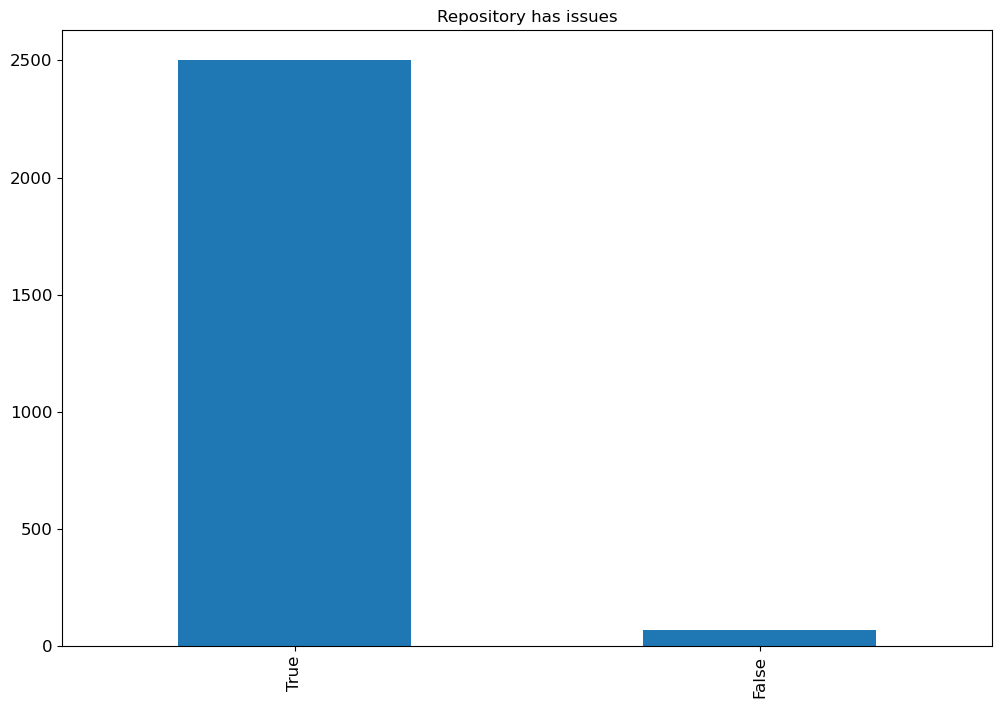

In [14]:
repos['has_issues'].value_counts().plot.bar(fontsize = 12, title = 'Repository has issues')
plt.savefig(Path(fp_figs, f'has_issues_{subset}.png'))

## Open issues

The amount of open issues a repository has

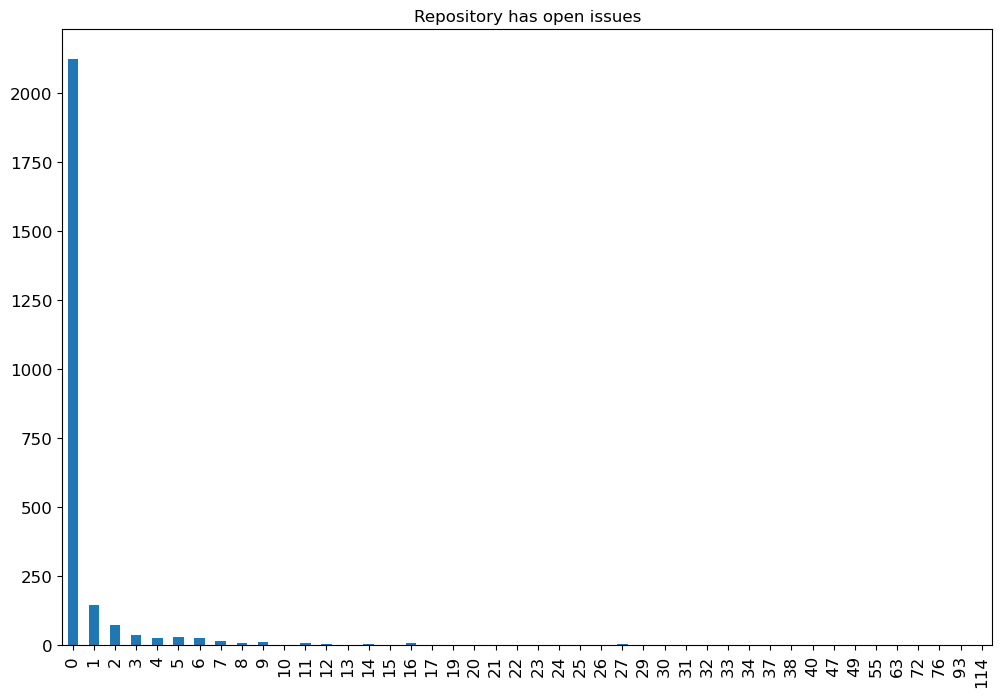

In [15]:
repos['open_issues'].value_counts().sort_index().plot.bar(fontsize = 12, title = 'Repository has open issues')
plt.savefig(Path(fp_figs, f'open_issues_{subset}.png'))

## Fork count

A fork is a copy of a repository for another user.

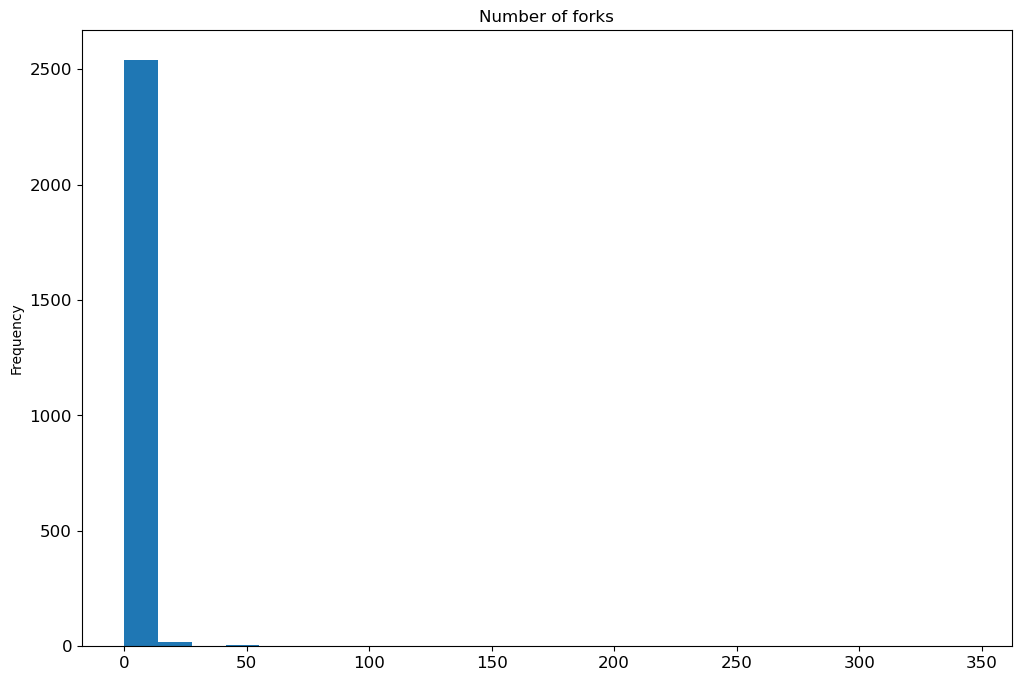

In [16]:
repos['forks'].plot.hist(fontsize = 12, title = 'Number of forks', bins = 25)
plt.savefig(Path(fp_figs, f'forks_{subset}.png'))

## Default branch

The default branch is the standard branch of a repository.

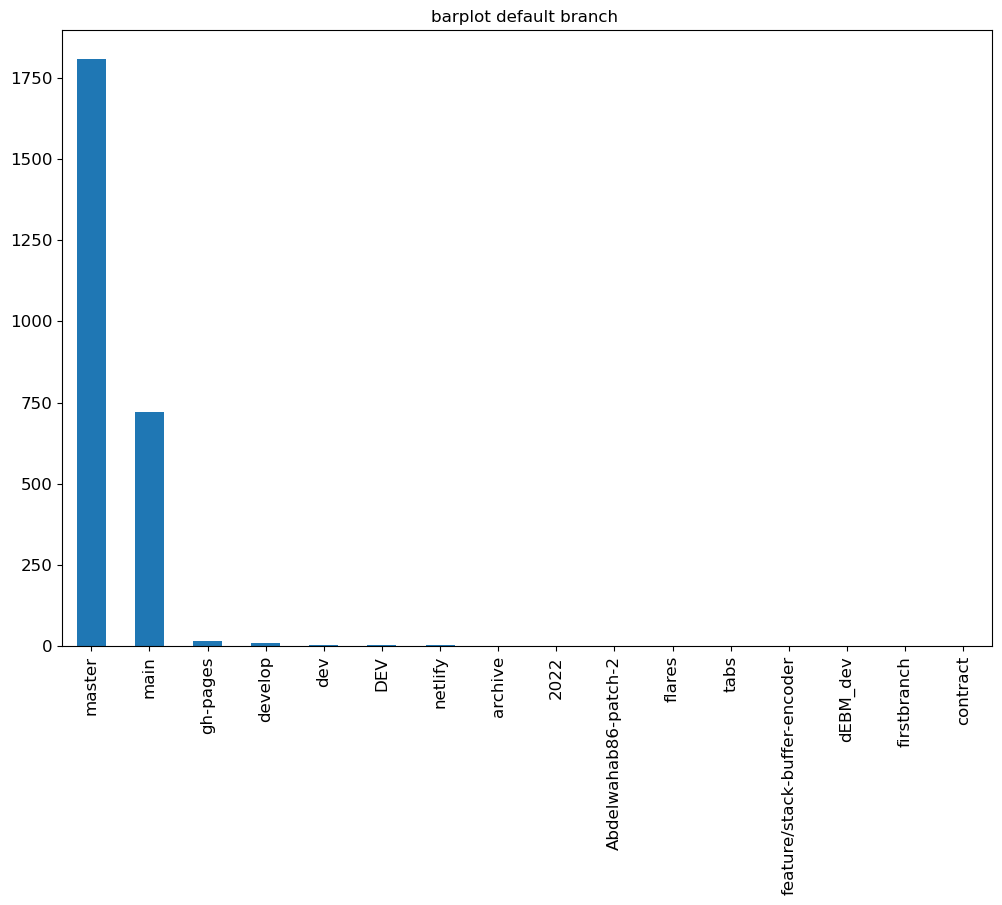

In [17]:
repos['default_branch'].value_counts().plot.bar(fontsize = 12, title = 'barplot default branch ')
plt.savefig(Path(fp_figs, f'default_branch_{subset}.png'))

## Homepage

The homepage is often the personal website of the research group or user. 

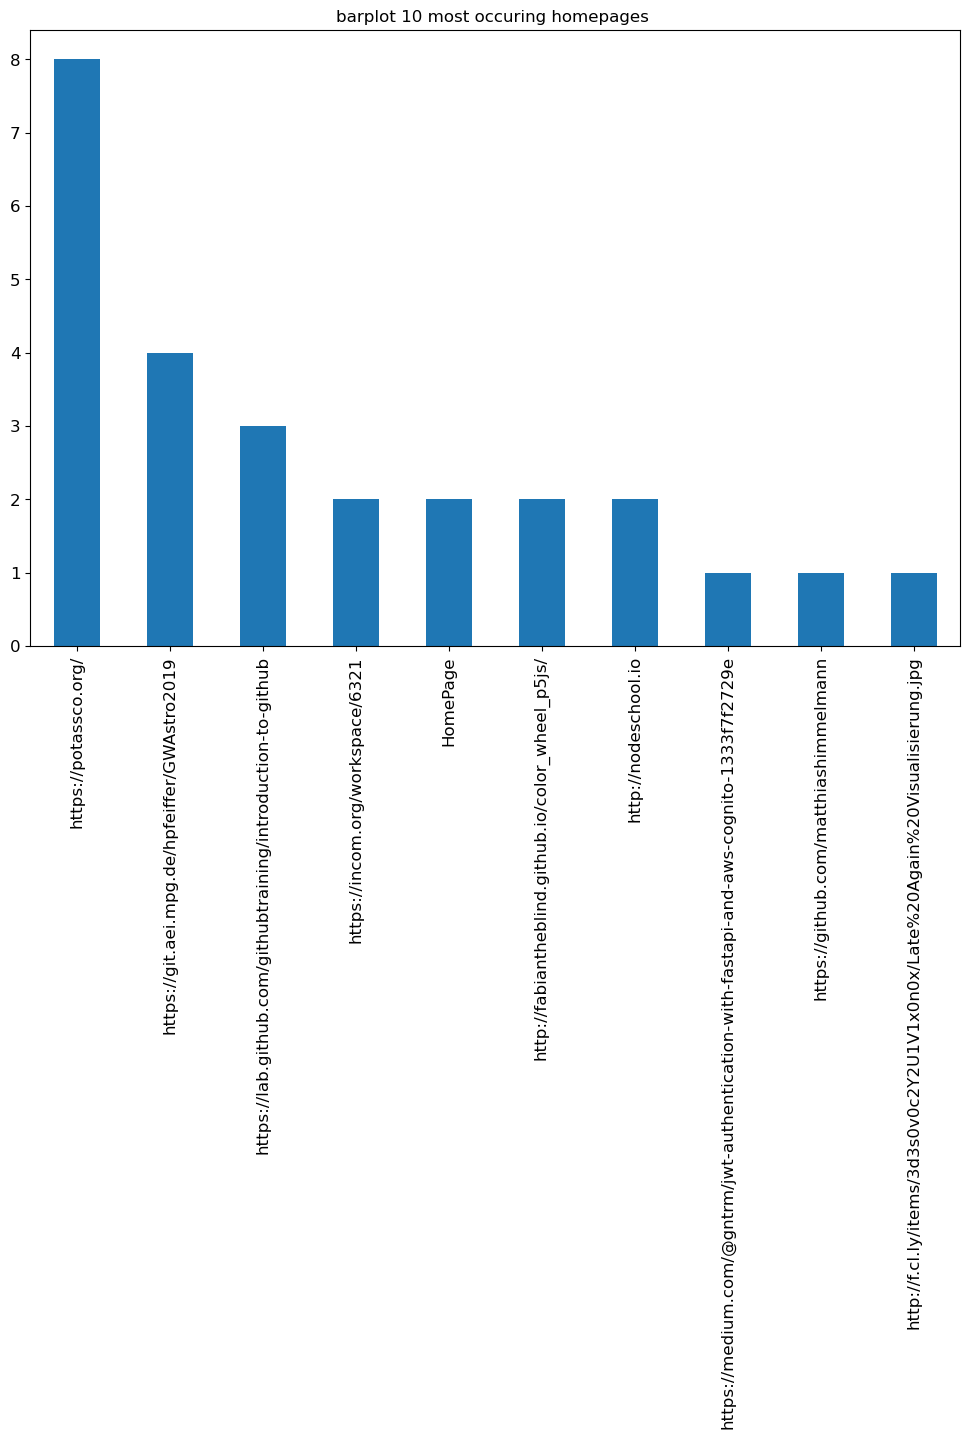

In [18]:
repos['homepage'].value_counts().nlargest(10).plot.bar(fontsize = 12, title = 'barplot 10 most occuring homepages ')
plt.savefig(Path(fp_figs, f'homepage_{subset}.png'))

## Most recent commits 

If a repository is really active, we expect them to be more FAIR. As stated, a higher FAIR score implies a repository that is easier to find and work with.

In [19]:
months_ago_most_recent_commit =[]
today = str(date.today())
split_today = today.split('-')
for date_item in repos['updated_at']:
    split_date = date_item.split('-')
    years_ago = int(split_today[0]) - int(split_date[0])
    months_ago = 12 * years_ago + (int(split_today[1]) - int(split_date[1]))
    months_ago_most_recent_commit.append(months_ago)
repos['months_ago_most_recent_commit'] = months_ago_most_recent_commit

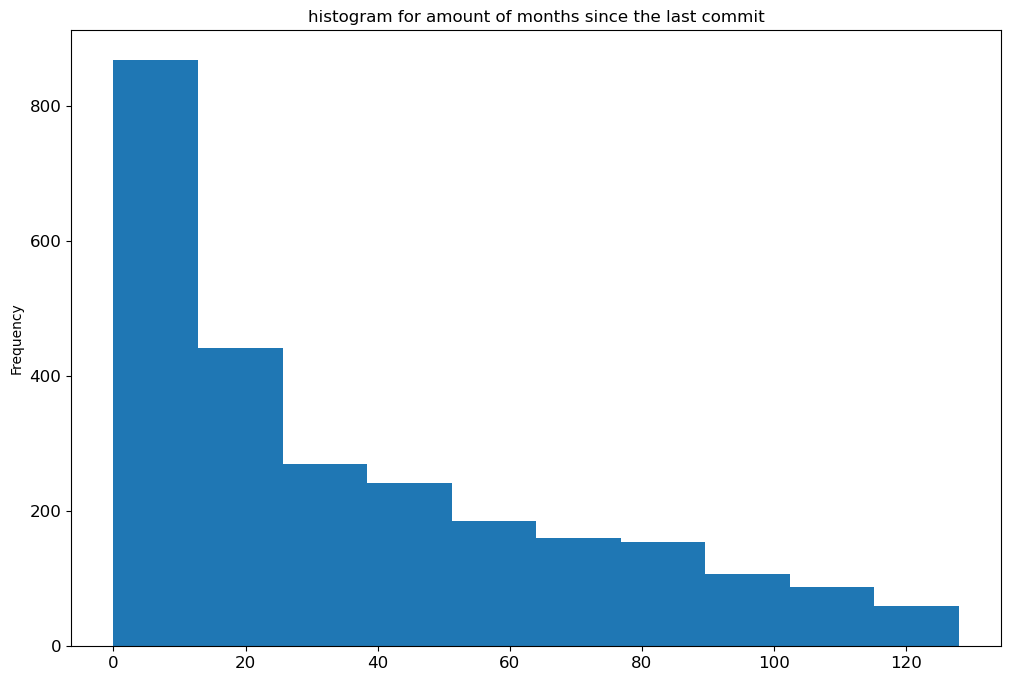

In [20]:
repos['months_ago_most_recent_commit'].plot(kind = 'hist', fontsize = 12, title = 'histogram for amount of months since the last commit') #Add x-axis months ago
plt.savefig(Path(fp_figs, f'most_recent_commit_months_{subset}.png'))

In [21]:
print('mean contributors: {:.1f}'.format(statistics.mean(repos['months_ago_most_recent_commit'])))
print('median contributors: {}'.format(statistics.median(repos['months_ago_most_recent_commit'])))


mean contributors: 36.6
median contributors: 25
